## Import Modules and Download Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/american-companies-bankruptcy-prediction-dataset/american_bankruptcy.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_csv("/kaggle/input/american-companies-bankruptcy-prediction-dataset/american_bankruptcy.csv")
data

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,alive,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,...,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,alive,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,...,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,alive,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,...,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,alive,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,...,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


## Make Some Basic Analysis Through Grouping

In [4]:
status_summary = data[['year']].groupby(data["status_label"]).aggregate('count')
status_summary

,year
status_label,
alive,73462
failed,5220


In [5]:
len(set(data["company_name"]))

8971

In [6]:
data.describe()

,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,7.868200e+04,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,2007.506317,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,3.414355e+03,2364.019706,2867.110620,722.483710,255.525035,769.490783,610.072255,532.467069,2364.019706,1773.563963,1987.260307
std,5.742768,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,1.841410e+04,11950.068842,12917.944421,3242.170946,1494.643534,3774.703114,2938.387443,6369.159440,11950.068842,8053.684902,10419.629038
min,1999.000000,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000
25%,2002.000000,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,3.498000e+01,27.548500,37.363500,0.000000,-2.787000,8.521250,8.889250,-68.282750,27.548500,13.486000,32.872500
50%,2007.000000,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,2.275118e+02,186.598500,213.203500,7.593500,6.518000,63.581500,43.333000,-1.131000,186.598500,81.988000,168.912000
75%,2012.000000,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,1.244890e+03,1046.402500,1171.364750,248.760750,87.599000,344.074250,222.817000,146.070000,1046.402500,629.975000,875.522250
max,2018.000000,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000


In [7]:
alive_data = data[data["status_label"]=="alive"]
failed_data = data[data["status_label"]=="failed"]

In [8]:
alive_data

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78677,C_8971,alive,2014,233.211,43.338,14.094,45.615,3.376,25.261,22.846,...,104.223,1099.101,184.666,31.521,60.885,28.197,28.095,104.223,225.887,58.608
78678,C_8971,alive,2015,105.559,59.184,42.592,202.133,2.288,129.688,54.611,...,291.153,1865.926,770.103,159.541,231.969,88.128,157.783,291.153,880.327,89.020
78679,C_8971,alive,2016,63.971,69.074,65.057,79.051,2.581,-1.442,42.467,...,169.858,1746.235,683.985,13.994,100.784,85.765,156.341,169.858,770.233,90.807
78680,C_8971,alive,2017,135.207,66.527,65.330,69.171,2.013,-20.401,27.217,...,161.884,1736.110,694.035,3.841,95.357,82.010,135.941,161.884,776.697,92.713


In [9]:
failed_data

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
50,C_6,failed,1999,4424.000,15482.000,1092.000,2248.000,708.000,985.000,1134.000,...,17730.000,24374.000,5689.000,1156.000,2248.000,5864.000,5716.000,17730.000,17516.000,15482.000
51,C_6,failed,2000,5179.000,17120.000,1202.000,2583.000,757.000,813.000,1303.000,...,19703.000,26213.000,5474.000,1381.000,2583.000,6990.000,5948.000,19703.000,19037.000,17120.000
52,C_6,failed,2001,6540.000,19419.000,1404.000,-456.000,822.000,-1762.000,1414.000,...,18963.000,32841.000,9834.000,-1860.000,-456.000,7512.000,4042.000,18963.000,27468.000,19419.000
53,C_6,failed,2002,4937.000,18555.000,1366.000,-1256.000,627.000,-3511.000,1481.000,...,17299.000,30267.000,12310.000,-2622.000,-1256.000,7240.000,-399.000,17299.000,29310.000,18555.000
54,C_6,failed,2003,4682.000,14430.000,1377.000,582.000,516.000,-1228.000,796.000,...,17440.000,29330.000,13126.000,-795.000,3010.000,6559.000,-1336.000,17440.000,29284.000,16858.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78612,C_8959,failed,2015,968.923,2914.948,755.602,-1625.996,7.867,-2433.838,156.189,...,1405.452,4690.829,4597.037,-2381.598,-1509.496,358.987,-2573.113,1405.452,5419.551,3031.448
78621,C_8961,failed,2009,34.472,124.183,1.120,-10.515,9.846,-13.534,20.755,...,143.959,47.849,0.000,-11.635,19.776,41.561,-25.627,143.959,41.561,154.474
78622,C_8961,failed,2010,76.174,164.776,1.186,-13.458,22.798,-30.027,31.687,...,190.116,89.269,0.000,-14.644,25.340,66.793,-55.778,190.116,76.210,203.574
78623,C_8961,failed,2011,284.269,281.041,2.297,-3.819,108.664,-17.667,72.543,...,365.774,358.703,0.000,-6.116,84.733,100.842,-73.759,365.774,112.201,369.593


## Plot Some Simple Diagrams

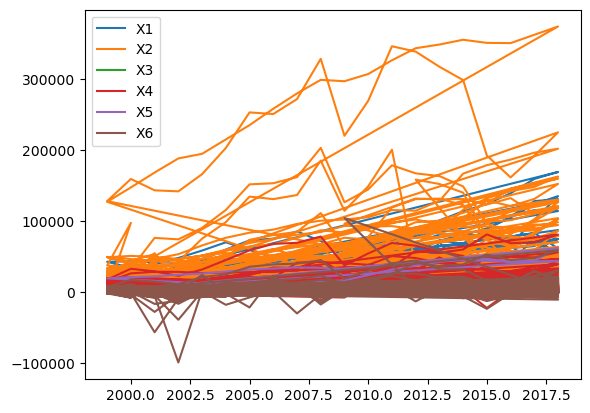

In [10]:
plt.plot(data['year'], data["X1"], label = "X1")
plt.plot(data['year'], data["X2"], label = "X2")
plt.plot(data['year'], data["X3"], label = "X3")
plt.plot(data['year'], data["X4"], label = "X4")
plt.plot(data['year'], data["X5"], label = "X5")
plt.plot(data['year'], data["X6"], label = "X6")
plt.legend()
plt.show()

In [11]:
data_c1 = data[data["company_name"]=="C_1"]
data_c1

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467
5,C_1,alive,2004,474.542,598.172,27.950,61.774,255.477,15.453,127.121,...,747.848,732.230,227.159,33.824,149.676,160.025,142.450,747.848,417.486,686.074
6,C_1,alive,2005,624.454,704.081,29.222,91.877,323.592,35.163,136.272,...,897.284,978.819,318.576,62.655,193.203,187.788,183.550,897.284,556.102,805.407
7,C_1,alive,2006,645.721,837.171,32.199,118.907,342.593,58.660,181.691,...,1061.169,1067.633,253.611,86.708,223.998,256.506,242.153,1061.169,573.390,942.262
8,C_1,alive,2007,783.431,1080.895,39.952,168.522,435.608,75.144,202.472,...,1384.919,1362.010,507.918,128.570,304.024,218.499,318.184,1384.919,776.755,1216.397
9,C_1,alive,2008,851.312,1110.677,40.551,166.080,477.424,78.651,227.300,...,1423.976,1377.511,392.984,125.529,313.299,254.418,385.851,1423.976,720.616,1257.896


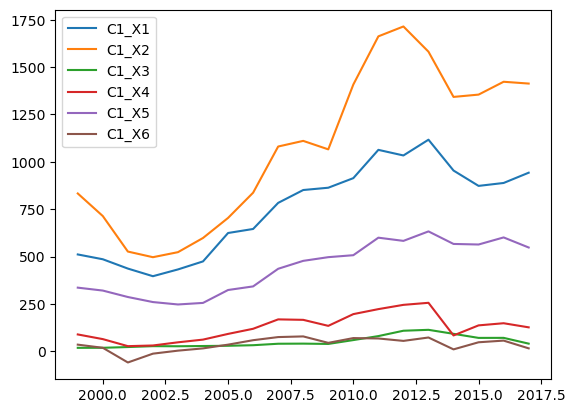

In [12]:
plt.plot(data_c1['year'], data_c1["X1"], label = "C1_X1")
plt.plot(data_c1['year'], data_c1["X2"], label = "C1_X2")
plt.plot(data_c1['year'], data_c1["X3"], label = "C1_X3")
plt.plot(data_c1['year'], data_c1["X4"], label = "C1_X4")
plt.plot(data_c1['year'], data_c1["X5"], label = "C1_X5")
plt.plot(data_c1['year'], data_c1["X6"], label = "C1_X6")
plt.legend()
plt.show()

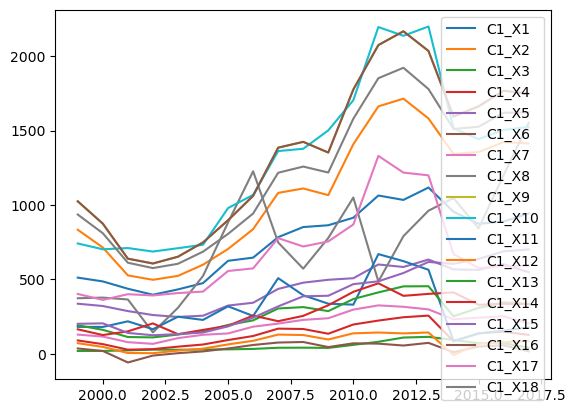

In [13]:
for i in range(1,19):
    plt.plot(data_c1['year'], data_c1["X"+str(i)], label = "C1_X"+str(i))
plt.legend()
plt.show()

#### I discover that there are much more of alive_data than failed_data, so I need to downsample

In [14]:
alive_downsample_data = resample(alive_data,
             replace=True,
             n_samples=len(failed_data),
             random_state=42)
alive_downsample_data

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
16880,C_1418,alive,1999,1.126,0.411,0.065,0.380,0.189,0.544,0.352,...,3.309,1.522,0.034,0.315,2.898,0.337,-0.503,3.309,0.371,2.929
921,C_79,alive,2002,350.569,754.571,32.468,181.155,129.451,83.698,175.230,...,1040.542,1030.006,279.636,148.687,285.971,261.420,430.012,1040.542,609.825,859.387
58782,C_6290,alive,2015,5121.000,11684.000,540.000,2464.000,1181.000,1450.000,3017.000,...,15165.000,11973.000,3956.000,1924.000,3481.000,3927.000,594.000,15165.000,9240.000,12701.000
6693,C_545,alive,2006,345.200,624.900,82.800,534.300,0.000,274.500,244.800,...,1546.300,1790.600,173.900,451.500,921.400,582.100,1546.400,1546.300,952.500,1012.000
39824,C_4115,alive,2010,1003.125,853.597,54.097,184.243,293.625,83.374,155.465,...,1197.446,1772.708,90.000,130.146,343.849,284.324,664.763,1197.446,496.090,1013.203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37395,C_3783,alive,2000,46.591,8.556,6.768,-1.352,0.000,-4.596,18.179,...,50.446,59.932,0.000,-8.120,41.890,15.782,-42.322,50.446,15.782,51.798
24089,C_2083,alive,2014,510.706,2189.589,64.309,446.231,190.823,249.048,118.296,...,2774.845,1111.252,10.000,381.922,585.256,147.635,724.696,2774.845,213.304,2328.614
58866,C_6299,alive,2003,354.551,230.048,119.424,320.051,12.394,-23.969,97.318,...,735.754,3478.941,2409.998,200.627,505.706,252.935,-1057.788,735.754,2983.207,415.703
17927,C_1505,alive,2018,8003.453,46912.433,729.500,3200.130,3125.413,1430.766,4137.835,...,58727.324,18070.404,7540.765,2470.630,11814.891,6588.746,8939.359,58727.324,15525.798,55527.194


In [15]:
new_data = pd.concat([alive_downsample_data,failed_data])
new_data

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
16880,C_1418,alive,1999,1.126,0.411,0.065,0.380,0.189,0.544,0.352,...,3.309,1.522,0.034,0.315,2.898,0.337,-0.503,3.309,0.371,2.929
921,C_79,alive,2002,350.569,754.571,32.468,181.155,129.451,83.698,175.230,...,1040.542,1030.006,279.636,148.687,285.971,261.420,430.012,1040.542,609.825,859.387
58782,C_6290,alive,2015,5121.000,11684.000,540.000,2464.000,1181.000,1450.000,3017.000,...,15165.000,11973.000,3956.000,1924.000,3481.000,3927.000,594.000,15165.000,9240.000,12701.000
6693,C_545,alive,2006,345.200,624.900,82.800,534.300,0.000,274.500,244.800,...,1546.300,1790.600,173.900,451.500,921.400,582.100,1546.400,1546.300,952.500,1012.000
39824,C_4115,alive,2010,1003.125,853.597,54.097,184.243,293.625,83.374,155.465,...,1197.446,1772.708,90.000,130.146,343.849,284.324,664.763,1197.446,496.090,1013.203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78612,C_8959,failed,2015,968.923,2914.948,755.602,-1625.996,7.867,-2433.838,156.189,...,1405.452,4690.829,4597.037,-2381.598,-1509.496,358.987,-2573.113,1405.452,5419.551,3031.448
78621,C_8961,failed,2009,34.472,124.183,1.120,-10.515,9.846,-13.534,20.755,...,143.959,47.849,0.000,-11.635,19.776,41.561,-25.627,143.959,41.561,154.474
78622,C_8961,failed,2010,76.174,164.776,1.186,-13.458,22.798,-30.027,31.687,...,190.116,89.269,0.000,-14.644,25.340,66.793,-55.778,190.116,76.210,203.574
78623,C_8961,failed,2011,284.269,281.041,2.297,-3.819,108.664,-17.667,72.543,...,365.774,358.703,0.000,-6.116,84.733,100.842,-73.759,365.774,112.201,369.593


#### I selected those finanical value X1-X18 as features or KPIs

In [16]:
kpis = new_data[[i for i in new_data.columns if i not in ["company_name","status_label","year"]]]
kpis

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
16880,1.126,0.411,0.065,0.380,0.189,0.544,0.352,3.4713,3.309,1.522,0.034,0.315,2.898,0.337,-0.503,3.309,0.371,2.929
921,350.569,754.571,32.468,181.155,129.451,83.698,175.230,1272.7488,1040.542,1030.006,279.636,148.687,285.971,261.420,430.012,1040.542,609.825,859.387
58782,5121.000,11684.000,540.000,2464.000,1181.000,1450.000,3017.000,23850.7718,15165.000,11973.000,3956.000,1924.000,3481.000,3927.000,594.000,15165.000,9240.000,12701.000
6693,345.200,624.900,82.800,534.300,0.000,274.500,244.800,5062.8200,1546.300,1790.600,173.900,451.500,921.400,582.100,1546.400,1546.300,952.500,1012.000
39824,1003.125,853.597,54.097,184.243,293.625,83.374,155.465,1175.4407,1197.446,1772.708,90.000,130.146,343.849,284.324,664.763,1197.446,496.090,1013.203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78612,968.923,2914.948,755.602,-1625.996,7.867,-2433.838,156.189,248.9111,1405.452,4690.829,4597.037,-2381.598,-1509.496,358.987,-2573.113,1405.452,5419.551,3031.448
78621,34.472,124.183,1.120,-10.515,9.846,-13.534,20.755,111.7148,143.959,47.849,0.000,-11.635,19.776,41.561,-25.627,143.959,41.561,154.474
78622,76.174,164.776,1.186,-13.458,22.798,-30.027,31.687,267.9931,190.116,89.269,0.000,-14.644,25.340,66.793,-55.778,190.116,76.210,203.574
78623,284.269,281.041,2.297,-3.819,108.664,-17.667,72.543,572.2637,365.774,358.703,0.000,-6.116,84.733,100.842,-73.759,365.774,112.201,369.593


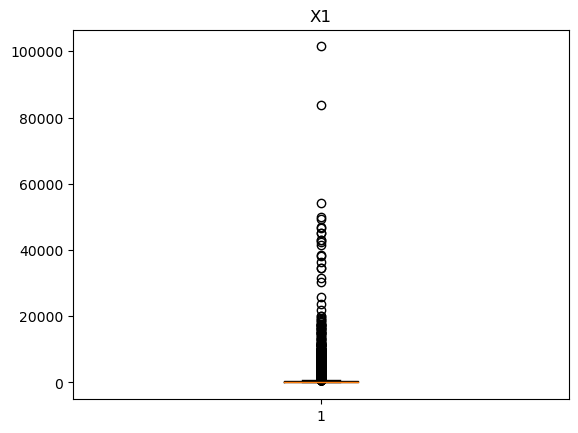

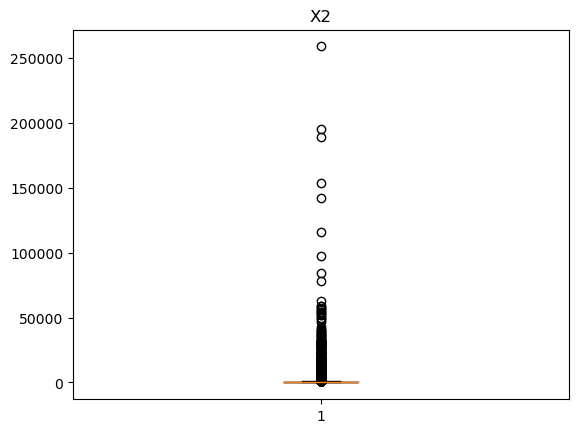

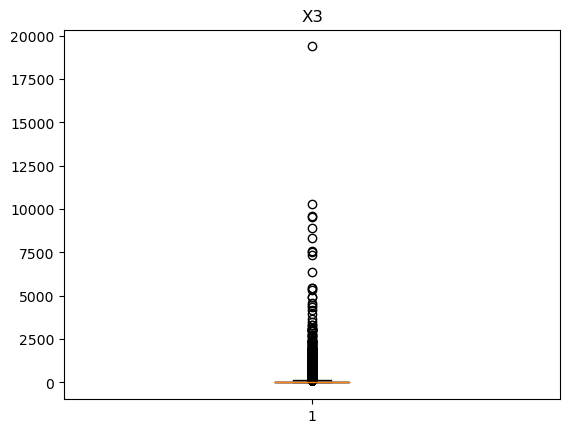

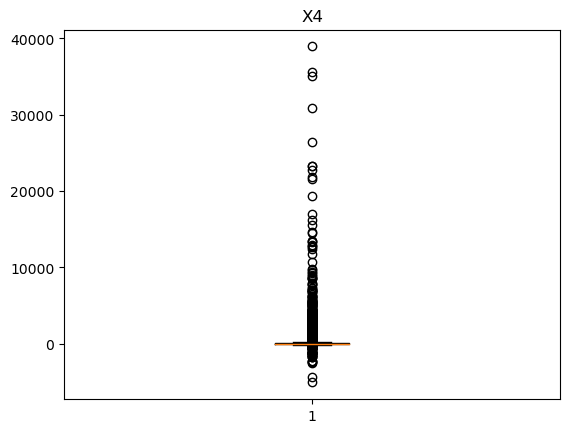

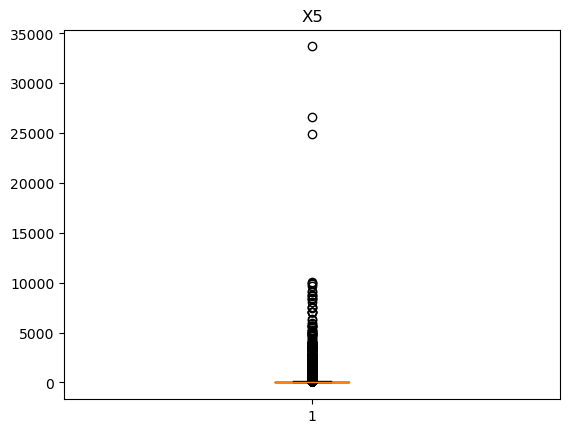

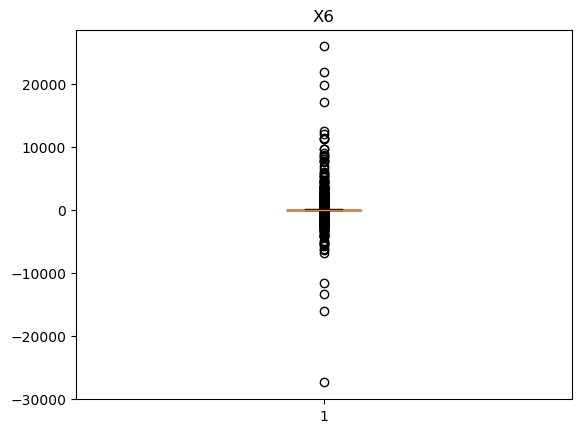

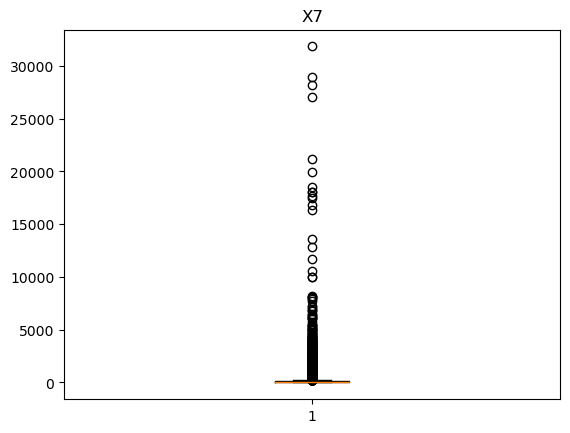

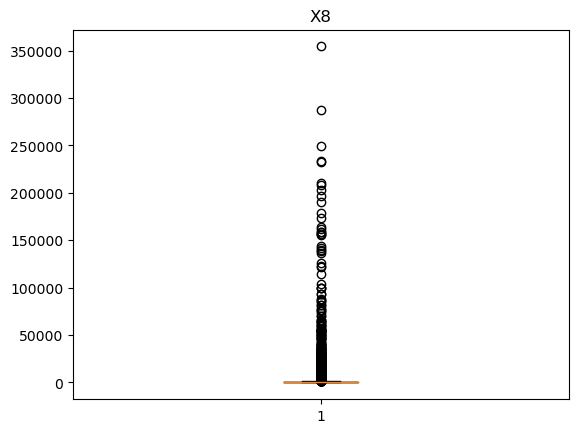

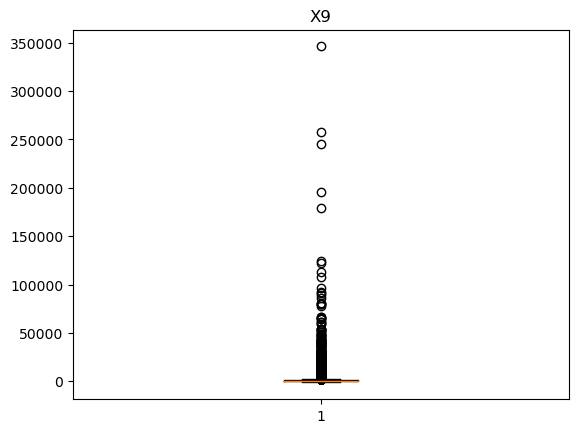

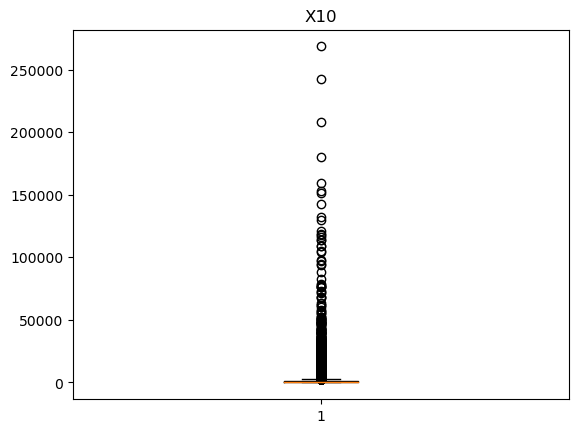

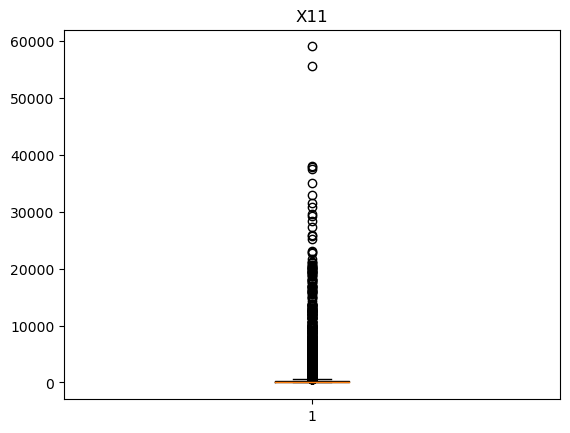

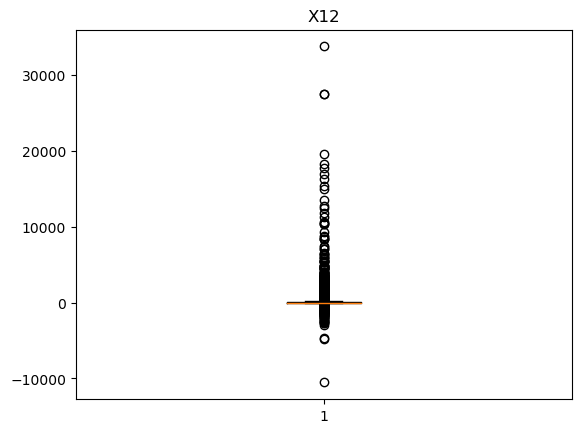

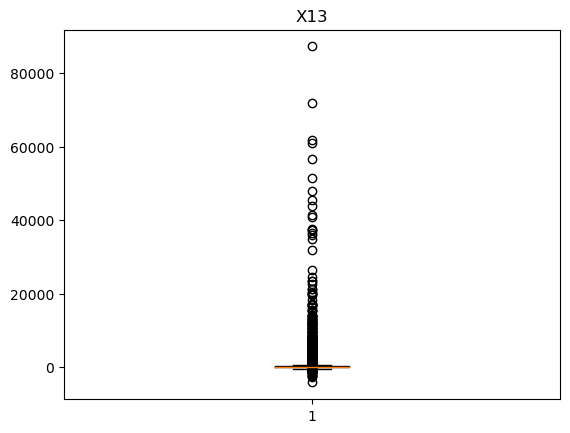

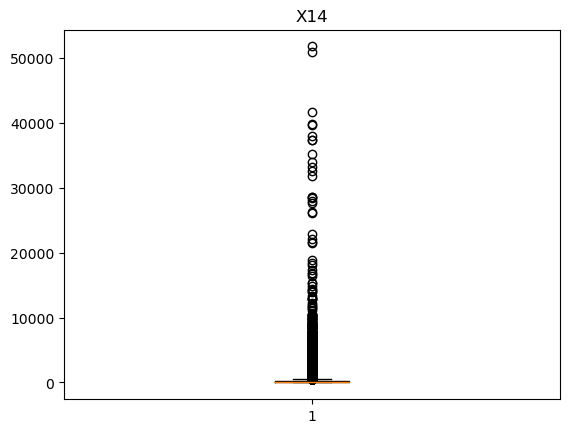

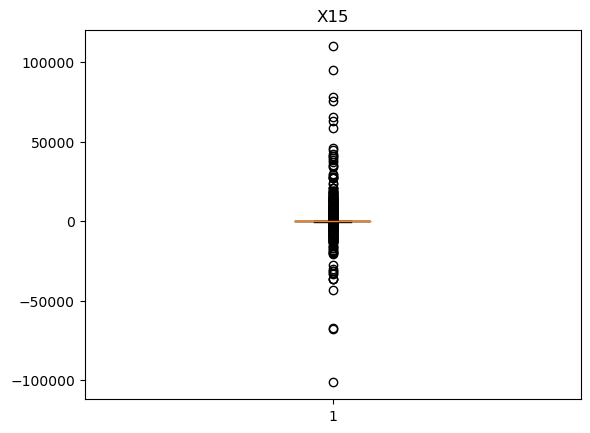

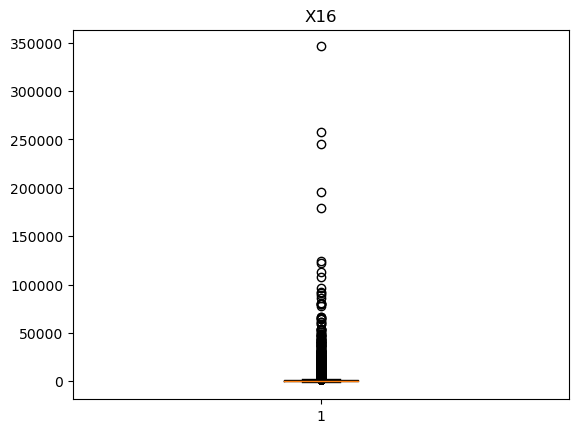

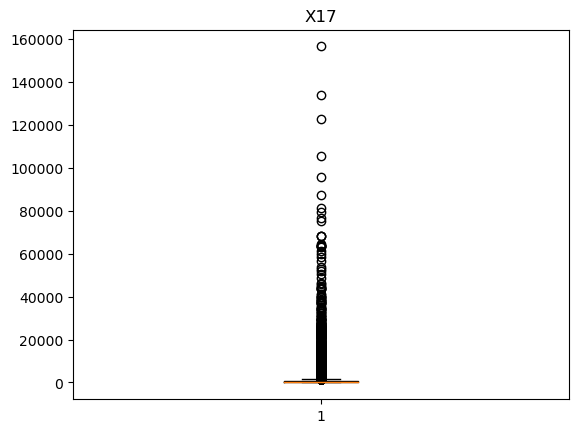

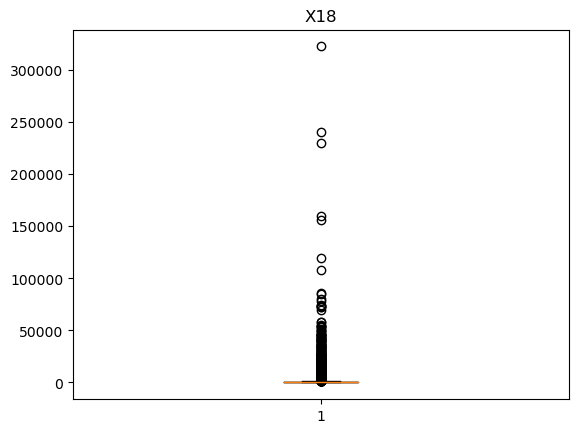

In [17]:
for each in kpis.columns:
    fig1, ax1 = plt.subplots()
    ax1.set_title(each)
    ax1.boxplot(kpis[each])

#### I choose to use correlation so that some of features may not be needed

[Text(0.5, 0, 'X1'),
 Text(1.5, 0, 'X2'),
 Text(2.5, 0, 'X3'),
 Text(3.5, 0, 'X4'),
 Text(4.5, 0, 'X5'),
 Text(5.5, 0, 'X6'),
 Text(6.5, 0, 'X7'),
 Text(7.5, 0, 'X8'),
 Text(8.5, 0, 'X9'),
 Text(9.5, 0, 'X10'),
 Text(10.5, 0, 'X11'),
 Text(11.5, 0, 'X12'),
 Text(12.5, 0, 'X13'),
 Text(13.5, 0, 'X14'),
 Text(14.5, 0, 'X15'),
 Text(15.5, 0, 'X16'),
 Text(16.5, 0, 'X17'),
 Text(17.5, 0, 'X18')]

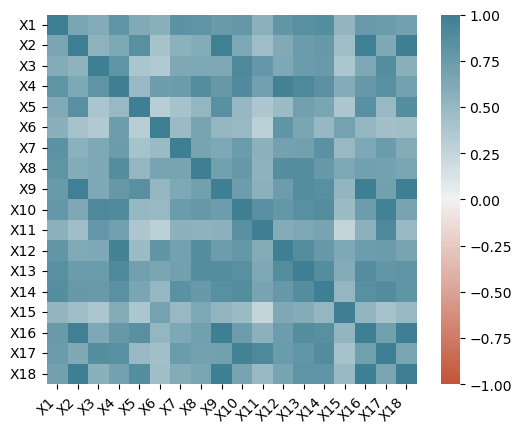

In [18]:
corr = kpis.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [19]:
corr2 = kpis.corr()
corr2.style.background_gradient(cmap='coolwarm')

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
X1,1.000000,0.652307,0.603639,0.798962,0.616793,0.574871,0.824096,0.814656,0.753796,0.775062,0.564495,0.792077,0.848474,0.866721,0.516236,0.753796,0.736395,0.709532
X2,0.652307,1.000000,0.540940,0.643269,0.836826,0.415456,0.563060,0.595352,0.976694,0.628440,0.466342,0.612493,0.741692,0.759032,0.452599,0.976694,0.620194,0.989097
X3,0.603639,0.540940,1.000000,0.815217,0.390977,0.355049,0.640009,0.643470,0.639058,0.902173,0.777726,0.631769,0.747227,0.750322,0.386992,0.639058,0.864962,0.576995
X4,0.798962,0.643269,0.815217,1.000000,0.488561,0.719363,0.737461,0.868749,0.766760,0.896889,0.715494,0.963965,0.909867,0.830791,0.605193,0.766760,0.850409,0.688400
X5,0.616793,0.836826,0.390977,0.488561,1.000000,0.314955,0.408934,0.509737,0.842907,0.502449,0.373248,0.474311,0.700616,0.652756,0.382192,0.842907,0.487657,0.865462
X6,0.574871,0.415456,0.355049,0.719363,0.314955,1.000000,0.477725,0.677927,0.514740,0.494984,0.295236,0.799726,0.648663,0.501313,0.680103,0.514740,0.434909,0.453586
X7,0.824096,0.563060,0.640009,0.737461,0.408934,0.477725,1.000000,0.679326,0.643282,0.739031,0.552569,0.693056,0.709322,0.832828,0.497364,0.643282,0.742320,0.595606
X8,0.814656,0.595352,0.643470,0.868749,0.509737,0.677927,0.679326,1.000000,0.717290,0.769506,0.541785,0.867185,0.865986,0.758955,0.625217,0.717290,0.688319,0.655863
X9,0.753796,0.976694,0.639058,0.766760,0.842907,0.514740,0.643282,0.717290,1.000000,0.732149,0.549726,0.732707,0.868371,0.839570,0.525027,1.000000,0.711526,0.993452
X10,0.775062,0.628440,0.902173,0.896889,0.502449,0.494984,0.739031,0.769506,0.732149,1.000000,0.839514,0.786017,0.835971,0.873336,0.469115,0.732149,0.956377,0.667644


#### It looks like that many features have high correlations with each other, which means I only need to select those that doesn't have strong correlation to make the training model

In [20]:
kpis.corr().unstack().sort_values()

X11  X15    0.251075
X15  X11    0.251075
X11  X6     0.295236
X6   X11    0.295236
     X5     0.314955
              ...   
X14  X14    1.000000
X15  X15    1.000000
X16  X9     1.000000
X9   X16    1.000000
X18  X18    1.000000
Length: 324, dtype: float64

In [21]:
standard_data = new_data.copy()
standard_data

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
16880,C_1418,alive,1999,1.126,0.411,0.065,0.380,0.189,0.544,0.352,...,3.309,1.522,0.034,0.315,2.898,0.337,-0.503,3.309,0.371,2.929
921,C_79,alive,2002,350.569,754.571,32.468,181.155,129.451,83.698,175.230,...,1040.542,1030.006,279.636,148.687,285.971,261.420,430.012,1040.542,609.825,859.387
58782,C_6290,alive,2015,5121.000,11684.000,540.000,2464.000,1181.000,1450.000,3017.000,...,15165.000,11973.000,3956.000,1924.000,3481.000,3927.000,594.000,15165.000,9240.000,12701.000
6693,C_545,alive,2006,345.200,624.900,82.800,534.300,0.000,274.500,244.800,...,1546.300,1790.600,173.900,451.500,921.400,582.100,1546.400,1546.300,952.500,1012.000
39824,C_4115,alive,2010,1003.125,853.597,54.097,184.243,293.625,83.374,155.465,...,1197.446,1772.708,90.000,130.146,343.849,284.324,664.763,1197.446,496.090,1013.203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78612,C_8959,failed,2015,968.923,2914.948,755.602,-1625.996,7.867,-2433.838,156.189,...,1405.452,4690.829,4597.037,-2381.598,-1509.496,358.987,-2573.113,1405.452,5419.551,3031.448
78621,C_8961,failed,2009,34.472,124.183,1.120,-10.515,9.846,-13.534,20.755,...,143.959,47.849,0.000,-11.635,19.776,41.561,-25.627,143.959,41.561,154.474
78622,C_8961,failed,2010,76.174,164.776,1.186,-13.458,22.798,-30.027,31.687,...,190.116,89.269,0.000,-14.644,25.340,66.793,-55.778,190.116,76.210,203.574
78623,C_8961,failed,2011,284.269,281.041,2.297,-3.819,108.664,-17.667,72.543,...,365.774,358.703,0.000,-6.116,84.733,100.842,-73.759,365.774,112.201,369.593


In [22]:
standard_data.dropna(inplace=True)
standard_data

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
16880,C_1418,alive,1999,1.126,0.411,0.065,0.380,0.189,0.544,0.352,...,3.309,1.522,0.034,0.315,2.898,0.337,-0.503,3.309,0.371,2.929
921,C_79,alive,2002,350.569,754.571,32.468,181.155,129.451,83.698,175.230,...,1040.542,1030.006,279.636,148.687,285.971,261.420,430.012,1040.542,609.825,859.387
58782,C_6290,alive,2015,5121.000,11684.000,540.000,2464.000,1181.000,1450.000,3017.000,...,15165.000,11973.000,3956.000,1924.000,3481.000,3927.000,594.000,15165.000,9240.000,12701.000
6693,C_545,alive,2006,345.200,624.900,82.800,534.300,0.000,274.500,244.800,...,1546.300,1790.600,173.900,451.500,921.400,582.100,1546.400,1546.300,952.500,1012.000
39824,C_4115,alive,2010,1003.125,853.597,54.097,184.243,293.625,83.374,155.465,...,1197.446,1772.708,90.000,130.146,343.849,284.324,664.763,1197.446,496.090,1013.203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78612,C_8959,failed,2015,968.923,2914.948,755.602,-1625.996,7.867,-2433.838,156.189,...,1405.452,4690.829,4597.037,-2381.598,-1509.496,358.987,-2573.113,1405.452,5419.551,3031.448
78621,C_8961,failed,2009,34.472,124.183,1.120,-10.515,9.846,-13.534,20.755,...,143.959,47.849,0.000,-11.635,19.776,41.561,-25.627,143.959,41.561,154.474
78622,C_8961,failed,2010,76.174,164.776,1.186,-13.458,22.798,-30.027,31.687,...,190.116,89.269,0.000,-14.644,25.340,66.793,-55.778,190.116,76.210,203.574
78623,C_8961,failed,2011,284.269,281.041,2.297,-3.819,108.664,-17.667,72.543,...,365.774,358.703,0.000,-6.116,84.733,100.842,-73.759,365.774,112.201,369.593


In [23]:
standard_data_v1 = standard_data[[i for i in standard_data.columns if i not in ["company_name","year"]]]
standard_data_v1 

,status_label,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
16880,alive,1.126,0.411,0.065,0.380,0.189,0.544,0.352,3.4713,3.309,1.522,0.034,0.315,2.898,0.337,-0.503,3.309,0.371,2.929
921,alive,350.569,754.571,32.468,181.155,129.451,83.698,175.230,1272.7488,1040.542,1030.006,279.636,148.687,285.971,261.420,430.012,1040.542,609.825,859.387
58782,alive,5121.000,11684.000,540.000,2464.000,1181.000,1450.000,3017.000,23850.7718,15165.000,11973.000,3956.000,1924.000,3481.000,3927.000,594.000,15165.000,9240.000,12701.000
6693,alive,345.200,624.900,82.800,534.300,0.000,274.500,244.800,5062.8200,1546.300,1790.600,173.900,451.500,921.400,582.100,1546.400,1546.300,952.500,1012.000
39824,alive,1003.125,853.597,54.097,184.243,293.625,83.374,155.465,1175.4407,1197.446,1772.708,90.000,130.146,343.849,284.324,664.763,1197.446,496.090,1013.203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78612,failed,968.923,2914.948,755.602,-1625.996,7.867,-2433.838,156.189,248.9111,1405.452,4690.829,4597.037,-2381.598,-1509.496,358.987,-2573.113,1405.452,5419.551,3031.448
78621,failed,34.472,124.183,1.120,-10.515,9.846,-13.534,20.755,111.7148,143.959,47.849,0.000,-11.635,19.776,41.561,-25.627,143.959,41.561,154.474
78622,failed,76.174,164.776,1.186,-13.458,22.798,-30.027,31.687,267.9931,190.116,89.269,0.000,-14.644,25.340,66.793,-55.778,190.116,76.210,203.574
78623,failed,284.269,281.041,2.297,-3.819,108.664,-17.667,72.543,572.2637,365.774,358.703,0.000,-6.116,84.733,100.842,-73.759,365.774,112.201,369.593


In [24]:
columns = [i for i in standard_data.columns if i not in ["company_name","year","status_label"]]

standard_data_v1[columns] = (standard_data_v1[columns]-standard_data_v1[columns].mean())/standard_data_v1[columns].std()
standard_data_v1

/tmp/ipykernel_80/596216639.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  standard_data_v1[columns] = (standard_data_v1[columns]-standard_data_v1[columns].mean())/standard_data_v1[columns].std()


,status_label,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
16880,alive,-0.238453,-0.202773,-0.231524,-0.202542,-0.200846,-0.053546,-0.215422,-0.190478,-0.219099,-0.246626,-0.266128,-0.164739,-0.216183,-0.229810,-0.049270,-0.219099,-0.257530,-0.211516
921,alive,-0.108308,-0.074496,-0.156141,-0.058208,-0.026740,0.049967,-0.039556,-0.079130,-0.088658,-0.133220,-0.150047,-0.006186,-0.104936,-0.101609,0.073955,-0.088658,-0.150893,-0.089817
58782,alive,1.668374,1.784521,1.024601,1.764453,1.389615,1.750792,2.818275,1.901538,1.687615,1.073408,1.376255,1.890950,1.150700,1.698329,0.120892,1.687615,1.359150,1.592836
6693,alive,-0.110308,-0.096552,-0.039046,0.223749,-0.201101,0.287485,0.030408,0.253356,-0.025055,-0.049354,-0.193945,0.317406,0.144786,0.055857,0.393493,-0.025055,-0.090934,-0.068131
39824,alive,0.134728,-0.057652,-0.105822,-0.055742,0.194390,0.049564,-0.059432,-0.087666,-0.068926,-0.051326,-0.228777,-0.025999,-0.082190,-0.090362,0.141146,-0.068926,-0.170793,-0.067960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78612,failed,0.121989,0.292969,1.526186,-1.501067,-0.190504,-3.083958,-0.058704,-0.168947,-0.042767,0.270440,1.642392,-2.710100,-0.810549,-0.053699,-0.785615,-0.042767,0.690677,0.218826
78621,failed,-0.226034,-0.181720,-0.229070,-0.211240,-0.187839,-0.071071,-0.194904,-0.180982,-0.201411,-0.241518,-0.266142,-0.177509,-0.209550,-0.209568,-0.056461,-0.201411,-0.250323,-0.189982
78622,failed,-0.210503,-0.174815,-0.228916,-0.213590,-0.170393,-0.091602,-0.183910,-0.167273,-0.195606,-0.236951,-0.266142,-0.180725,-0.207363,-0.197178,-0.065091,-0.195606,-0.244261,-0.183005
78623,failed,-0.133001,-0.155040,-0.226332,-0.205894,-0.054738,-0.076216,-0.142823,-0.140580,-0.173516,-0.207242,-0.266142,-0.171611,-0.184022,-0.180458,-0.070237,-0.173516,-0.237963,-0.159415


In [25]:
corr3 = standard_data_v1.corr()

corr3.style.background_gradient(cmap='coolwarm')

/tmp/ipykernel_80/1685641739.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr3 = standard_data_v1.corr()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
X1,1.000000,0.652307,0.603639,0.798962,0.616793,0.574871,0.824096,0.814656,0.753796,0.775062,0.564495,0.792077,0.848474,0.866721,0.516236,0.753796,0.736395,0.709532
X2,0.652307,1.000000,0.540940,0.643269,0.836826,0.415456,0.563060,0.595352,0.976694,0.628440,0.466342,0.612493,0.741692,0.759032,0.452599,0.976694,0.620194,0.989097
X3,0.603639,0.540940,1.000000,0.815217,0.390977,0.355049,0.640009,0.643470,0.639058,0.902173,0.777726,0.631769,0.747227,0.750322,0.386992,0.639058,0.864962,0.576995
X4,0.798962,0.643269,0.815217,1.000000,0.488561,0.719363,0.737461,0.868749,0.766760,0.896889,0.715494,0.963965,0.909867,0.830791,0.605193,0.766760,0.850409,0.688400
X5,0.616793,0.836826,0.390977,0.488561,1.000000,0.314955,0.408934,0.509737,0.842907,0.502449,0.373248,0.474311,0.700616,0.652756,0.382192,0.842907,0.487657,0.865462
X6,0.574871,0.415456,0.355049,0.719363,0.314955,1.000000,0.477725,0.677927,0.514740,0.494984,0.295236,0.799726,0.648663,0.501313,0.680103,0.514740,0.434909,0.453586
X7,0.824096,0.563060,0.640009,0.737461,0.408934,0.477725,1.000000,0.679326,0.643282,0.739031,0.552569,0.693056,0.709322,0.832828,0.497364,0.643282,0.742320,0.595606
X8,0.814656,0.595352,0.643470,0.868749,0.509737,0.677927,0.679326,1.000000,0.717290,0.769506,0.541785,0.867185,0.865986,0.758955,0.625217,0.717290,0.688319,0.655863
X9,0.753796,0.976694,0.639058,0.766760,0.842907,0.514740,0.643282,0.717290,1.000000,0.732149,0.549726,0.732707,0.868371,0.839570,0.525027,1.000000,0.711526,0.993452
X10,0.775062,0.628440,0.902173,0.896889,0.502449,0.494984,0.739031,0.769506,0.732149,1.000000,0.839514,0.786017,0.835971,0.873336,0.469115,0.732149,0.956377,0.667644


In [26]:
dfCorr = kpis.corr()
filteredDf2 = dfCorr[((dfCorr <= .5) & (dfCorr >= -.5)) & (dfCorr !=1.000)]
filteredDf2

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
X1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X2,NaN,NaN,NaN,NaN,NaN,0.415456,NaN,NaN,NaN,NaN,0.466342,NaN,NaN,NaN,0.452599,NaN,NaN,NaN
X3,NaN,NaN,NaN,NaN,0.390977,0.355049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.386992,NaN,NaN,NaN
X4,NaN,NaN,NaN,NaN,0.488561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X5,NaN,NaN,0.390977,0.488561,NaN,0.314955,0.408934,NaN,NaN,NaN,0.373248,0.474311,NaN,NaN,0.382192,NaN,0.487657,NaN
X6,NaN,0.415456,0.355049,NaN,0.314955,NaN,0.477725,NaN,NaN,0.494984,0.295236,NaN,NaN,NaN,NaN,NaN,0.434909,0.453586
X7,NaN,NaN,NaN,NaN,0.408934,0.477725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.497364,NaN,NaN,NaN
X8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X10,NaN,NaN,NaN,NaN,NaN,0.494984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.469115,NaN,NaN,NaN


In [27]:
for i in list(filteredDf2.columns):
    for j in list(filteredDf2.index):
        if filteredDf2[i][j]>0:
            print(i,j,filteredDf2[i][j])

X2 X6 0.41545578616938034
X2 X11 0.4663417313384187
X2 X15 0.4525989701259199
X3 X5 0.39097727996128595
X3 X6 0.3550493982790174
X3 X15 0.38699172154790434
X4 X5 0.48856081878521057
X5 X3 0.39097727996128595
X5 X4 0.48856081878521057
X5 X6 0.314954980536746
X5 X7 0.4089342150231206
X5 X11 0.3732476898901337
X5 X12 0.4743114822736211
X5 X15 0.382191710899724
X5 X17 0.48765706359456684
X6 X2 0.41545578616938034
X6 X3 0.3550493982790174
X6 X5 0.314954980536746
X6 X7 0.47772489498274445
X6 X10 0.49498381519053575
X6 X11 0.2952363292876423
X6 X17 0.43490917386617
X6 X18 0.45358552698897714
X7 X5 0.4089342150231206
X7 X6 0.47772489498274445
X7 X15 0.4973639431645655
X10 X6 0.49498381519053575
X10 X15 0.46911548937941433
X11 X2 0.4663417313384187
X11 X5 0.3732476898901337
X11 X6 0.2952363292876423
X11 X15 0.25107510125286187
X11 X18 0.4938048191030553
X12 X5 0.4743114822736211
X15 X2 0.4525989701259199
X15 X3 0.38699172154790434
X15 X5 0.382191710899724
X15 X7 0.4973639431645655
X15 X10 0.469

#### Based on the correlation, we can see that only a few of columns that have the absolute of correlation value of less than 0.5. Thus, I only choose these for my models

In [28]:
features = standard_data_v1[["X2","X3","X5","X6","X7","X11","X15"]]
features

,X2,X3,X5,X6,X7,X11,X15
16880,-0.202773,-0.231524,-0.200846,-0.053546,-0.215422,-0.266128,-0.049270
921,-0.074496,-0.156141,-0.026740,0.049967,-0.039556,-0.150047,0.073955
58782,1.784521,1.024601,1.389615,1.750792,2.818275,1.376255,0.120892
6693,-0.096552,-0.039046,-0.201101,0.287485,0.030408,-0.193945,0.393493
39824,-0.057652,-0.105822,0.194390,0.049564,-0.059432,-0.228777,0.141146
...,...,...,...,...,...,...,...
78612,0.292969,1.526186,-0.190504,-3.083958,-0.058704,1.642392,-0.785615
78621,-0.181720,-0.229070,-0.187839,-0.071071,-0.194904,-0.266142,-0.056461
78622,-0.174815,-0.228916,-0.170393,-0.091602,-0.183910,-0.266142,-0.065091
78623,-0.155040,-0.226332,-0.054738,-0.076216,-0.142823,-0.266142,-0.070237


In [29]:
target =  standard_data_v1[["status_label"]]
target

,status_label
16880,alive
921,alive
58782,alive
6693,alive
39824,alive
...,...
78612,failed
78621,failed
78622,failed
78623,failed


#### I decide to use 75% of data as training, but this portion is totally up to you.

In [30]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.75)

In [31]:
X_train

,X2,X3,X5,X6,X7,X11,X15
3985,-0.201467,-0.230864,-0.198778,-0.057259,-0.214644,-0.266142,-0.053905
74801,-0.154029,-0.171011,0.027039,-0.186547,-0.194958,-0.175253,-0.123753
63510,-0.181514,-0.231629,-0.197356,-0.040185,-0.207718,-0.266142,-0.045241
39424,-0.196870,-0.228553,-0.201101,-0.050643,-0.204624,-0.266142,-0.043693
3936,-0.198226,-0.224231,-0.181566,-0.069047,-0.202335,-0.259943,-0.059845
...,...,...,...,...,...,...,...
18633,-0.061063,0.157956,-0.123798,0.120371,0.469949,0.358832,0.675604
4016,0.034458,0.105646,-0.159851,0.089684,-0.146979,0.881208,0.372501
23342,-0.036209,-0.107835,0.263246,-0.067613,0.253422,0.033265,-0.036792
10024,-0.198836,-0.225013,-0.192030,-0.064782,-0.209731,-0.259882,-0.083589


In [32]:
y_train

,status_label
3985,failed
74801,failed
63510,alive
39424,failed
3936,alive
...,...
18633,failed
4016,alive
23342,failed
10024,failed


In [33]:
X_test

,X2,X3,X5,X6,X7,X11,X15
25231,-0.202557,-0.231306,-0.201101,-0.058639,-0.214880,-0.266142,-0.079606
56634,-0.197130,-0.229021,-0.188182,-0.059328,-0.214677,-0.265717,-0.050817
58481,0.405239,0.861751,-0.135101,-1.079970,-0.026713,1.637395,-0.216567
27598,-0.198907,-0.230708,-0.194251,-0.058308,-0.210380,-0.265223,-0.058817
3153,-0.167629,-0.178267,-0.152205,-0.033538,-0.143791,-0.202082,-0.054752
...,...,...,...,...,...,...,...
75970,-0.154478,-0.206587,0.097022,-0.068752,-0.186007,-0.208157,-0.086212
20351,-0.136591,-0.074757,-0.166490,-0.095427,-0.154444,-0.157587,-0.164359
11236,3.666257,2.020317,4.950879,-0.700294,4.002932,3.497339,1.364825
35494,-0.196758,-0.229212,-0.183970,-0.070074,-0.204058,-0.251649,-0.223648


In [34]:
y_test

,status_label
25231,alive
56634,failed
58481,alive
27598,failed
3153,alive
...,...
75970,failed
20351,failed
11236,alive
35494,failed


#### I tried k value form 1 to 9

In [35]:
for i in range(1,10):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn_model = knn.fit(X_train, y_train)
    y_pred_test = knn_model.predict(X_test)
    print("x="+str(i),classification_report(y_test, y_pred_test))  

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


x=1               precision    recall  f1-score   support

       alive       0.71      0.65      0.68      1341
      failed       0.66      0.73      0.69      1269

    accuracy                           0.69      2610
   macro avg       0.69      0.69      0.69      2610
weighted avg       0.69      0.69      0.69      2610



/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


x=2               precision    recall  f1-score   support

       alive       0.64      0.80      0.71      1341
      failed       0.71      0.53      0.60      1269

    accuracy                           0.67      2610
   macro avg       0.68      0.66      0.66      2610
weighted avg       0.67      0.67      0.66      2610



/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


x=3               precision    recall  f1-score   support

       alive       0.73      0.63      0.68      1341
      failed       0.66      0.75      0.70      1269

    accuracy                           0.69      2610
   macro avg       0.69      0.69      0.69      2610
weighted avg       0.70      0.69      0.69      2610



/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


x=4               precision    recall  f1-score   support

       alive       0.67      0.76      0.71      1341
      failed       0.70      0.61      0.65      1269

    accuracy                           0.68      2610
   macro avg       0.69      0.68      0.68      2610
weighted avg       0.69      0.68      0.68      2610



/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


x=5               precision    recall  f1-score   support

       alive       0.72      0.63      0.67      1341
      failed       0.65      0.74      0.69      1269

    accuracy                           0.68      2610
   macro avg       0.69      0.68      0.68      2610
weighted avg       0.69      0.68      0.68      2610



/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


x=6               precision    recall  f1-score   support

       alive       0.68      0.72      0.70      1341
      failed       0.69      0.65      0.67      1269

    accuracy                           0.69      2610
   macro avg       0.69      0.68      0.68      2610
weighted avg       0.69      0.69      0.69      2610



/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


x=7               precision    recall  f1-score   support

       alive       0.72      0.63      0.67      1341
      failed       0.65      0.74      0.69      1269

    accuracy                           0.68      2610
   macro avg       0.69      0.68      0.68      2610
weighted avg       0.69      0.68      0.68      2610



/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


x=8               precision    recall  f1-score   support

       alive       0.68      0.71      0.69      1341
      failed       0.68      0.65      0.66      1269

    accuracy                           0.68      2610
   macro avg       0.68      0.68      0.68      2610
weighted avg       0.68      0.68      0.68      2610



/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


x=9               precision    recall  f1-score   support

       alive       0.71      0.62      0.66      1341
      failed       0.65      0.74      0.69      1269

    accuracy                           0.68      2610
   macro avg       0.68      0.68      0.68      2610
weighted avg       0.68      0.68      0.67      2610



#### The performances are generally great.

#### Let's try SVC machine

In [36]:
svc = SVC()
svc.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [37]:
svc_y_pred_train = svc.predict(X_train)
print(classification_report(y_train, svc_y_pred_train))

              precision    recall  f1-score   support

       alive       0.76      0.21      0.33      3879
      failed       0.55      0.94      0.69      3951

    accuracy                           0.58      7830
   macro avg       0.66      0.57      0.51      7830
weighted avg       0.65      0.58      0.51      7830



In [38]:
svc_y_pred_test = svc.predict(X_test)
print(classification_report(y_test, svc_y_pred_test))

              precision    recall  f1-score   support

       alive       0.76      0.20      0.31      1341
      failed       0.52      0.93      0.67      1269

    accuracy                           0.56      2610
   macro avg       0.64      0.57      0.49      2610
weighted avg       0.64      0.56      0.49      2610



#### Results are okay, but not too good

#### Let's do decision tree, the max depth can be flexible. I choose 7 for this case only

In [39]:
dtc = DecisionTreeClassifier(max_depth=7)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7)

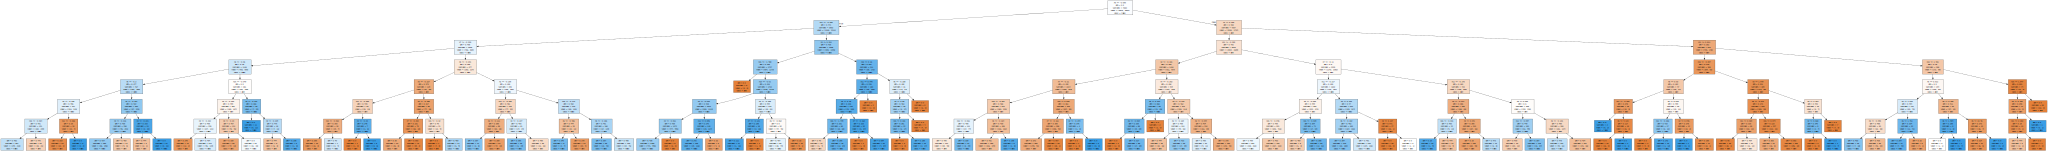

In [40]:
# DOT data
dot_data = tree.export_graphviz(dtc, out_file=None, 
                                feature_names=list(X_train.columns),  
                                class_names=list(set(y_train["status_label"])),
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [41]:
dtc_y_train_pred = dtc.predict(X_train)
print(classification_report(y_train, dtc_y_train_pred))

              precision    recall  f1-score   support

       alive       0.75      0.60      0.66      3879
      failed       0.67      0.80      0.73      3951

    accuracy                           0.70      7830
   macro avg       0.71      0.70      0.70      7830
weighted avg       0.71      0.70      0.70      7830



In [42]:
dtc_y_test_pred = dtc.predict(X_test)
print(classification_report(y_test, dtc_y_test_pred))

              precision    recall  f1-score   support

       alive       0.70      0.52      0.60      1341
      failed       0.60      0.76      0.67      1269

    accuracy                           0.64      2610
   macro avg       0.65      0.64      0.63      2610
weighted avg       0.65      0.64      0.63      2610



#### Again, it is acceptable but it can be better

#### I also tried logistic Regression

In [43]:
LR = LogisticRegression()
lr_model = LR.fit(X_train,y_train)
lr_model

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [44]:
lr_y_pred_train = lr_model.predict(X_train)
print(classification_report(y_train, lr_y_pred_train))

              precision    recall  f1-score   support

       alive       0.68      0.29      0.40      3879
      failed       0.55      0.87      0.67      3951

    accuracy                           0.58      7830
   macro avg       0.62      0.58      0.54      7830
weighted avg       0.61      0.58      0.54      7830



In [45]:
lr_y_pred_test = lr_model.predict(X_test)
print(classification_report(y_test, lr_y_pred_test))

              precision    recall  f1-score   support

       alive       0.71      0.28      0.40      1341
      failed       0.54      0.88      0.67      1269

    accuracy                           0.57      2610
   macro avg       0.63      0.58      0.54      2610
weighted avg       0.63      0.57      0.53      2610



## Conclusion: Over these models, the KNN is the best with k value of 4 to 7